# Homework: Sonar signal classification
In this workshop you will train a binary classification neural network to differentiate if sonar signals bounced against a metal cylinder or a rock.

[Info of the data](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks))

Goal: Get an accuracy higher than 0.80 in the validation set

## Get the data from Google Drive

In [1]:
# Import libraries to interact with Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
# Authenticate with your Google account to get access to the data
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Download data
download = drive.CreateFile({'id': '1rw5l3jCo2vlNc8NLrMk3KPZr6HsjNRCY'})
download.GetContentFile('sonar.csv')

In [4]:
ls

sample_data/  sonar.csv


## Do some magic below! ;)

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('/content/sonar.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [7]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [8]:
# Importamos las dependencias necesarias para el preprocesamiento de los datos.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [9]:
# Convertimos en array de numpy el Dataset de pandas.
df_numpy = df.values

In [10]:
# Mostramos el tipo de datos que tenemos antes y después de la conversión a array de Numpy. Porque las RRNN trabajan con arrays y no dataframes.
print(type(df))
print(type(df_numpy.dtype))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.dtypes.ObjectDType'>


In [11]:
len(df_numpy)

207

In [12]:
# Separamos entre X e Y. Como es numpy, tenemos que usar el slicing para poder obtener los datos de entrada y salida.
X = df_numpy[:, :60]
y = df_numpy[:, 60:61]

In [13]:
# Para comprobar que lo hemos hecho de forma correcta, printeamos los datos.
print(f'Los datos de X son: {X.shape}')
print(f'Los datos de y son: {y.shape}')

Los datos de X son: (207, 60)
Los datos de y son: (207, 1)


In [14]:
# A continuación vamos a normalizar las variables numéricas (X).
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_scaled

array([[ 0.70018948,  0.42042142,  1.0529498 , ..., -0.4709383 ,
        -0.44268846, -0.42246083],
       [-0.13089402,  0.59942737,  1.71912994, ...,  1.30656071,
         0.25299833,  0.25405324],
       [-0.83579208, -0.64754631,  0.48045125, ..., -0.54822087,
        -0.63683361,  1.03005467],
       ...,
       [ 1.00042384,  0.15949749, -0.67235266, ...,  0.90469137,
        -0.0382194 , -0.68112798],
       [ 0.0475061 , -0.09535845,  0.13434985, ..., -0.00724291,
        -0.70154866, -0.34287094],
       [-0.13959647, -0.06501846, -0.78685237, ..., -0.67187297,
        -0.2970796 ,  0.99025973]])

In [16]:
# Vamos a proceder a hacer un Label Encoder a la variable y.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y).toarray()


In [17]:
y_encoded

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

### MODELOS

In [18]:
# Lo primero que se realiza es la partición de los conjuntos de datos.
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size = 0.2)

In [19]:
# Importamos las diferentes dependencias para generar un modelo en Keras.
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [20]:
# Generamos la red neuronal
model = Sequential()
model.add(Dense(12, input_dim = 60, activation = 'relu')),
model.add(Dense(24, activation = 'relu')),
model.add(Dense(48, activation = 'relu')),
model.add(Dense(2, activation = 'sigmoid'))

In [21]:
# Resumen del modelo generado.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                732       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 48)                1200      
                                                                 
 dense_3 (Dense)             (None, 2)                 98        
                                                                 
Total params: 2342 (9.15 KB)
Trainable params: 2342 (9.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Se realiza la compilación del modelo: función de pérdidas, optimizador
# y métricas

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
# En este caso se utiliza binary_crossentropy porque el problema que
# abordamos, la salida es 0 y 1.

In [23]:
# Entrenamos la red neuronal generada
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/100
3/3 [==============================] - 5s 471ms/step - loss: 0.7157 - accuracy: 0.4727 - val_loss: 0.7170 - val_accuracy: 0.5238
Epoch 2/100
3/3 [==============================] - 0s 64ms/step - loss: 0.7014 - accuracy: 0.5212 - val_loss: 0.7067 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 0.6906 - accuracy: 0.6182 - val_loss: 0.6988 - val_accuracy: 0.5714
Epoch 4/100
3/3 [==============================] - 0s 39ms/step - loss: 0.6823 - accuracy: 0.6788 - val_loss: 0.6915 - val_accuracy: 0.5238
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 0.6745 - accuracy: 0.6909 - val_loss: 0.6846 - val_accuracy: 0.5476
Epoch 6/100
3/3 [==============================] - 0s 38ms/step - loss: 0.6671 - accuracy: 0.6970 - val_loss: 0.6773 - val_accuracy: 0.5714
Epoch 7/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6603 - accuracy: 0.7030 - val_loss: 0.6699 - val_accuracy: 0.5714
Epoch 8/100
3/3 [==

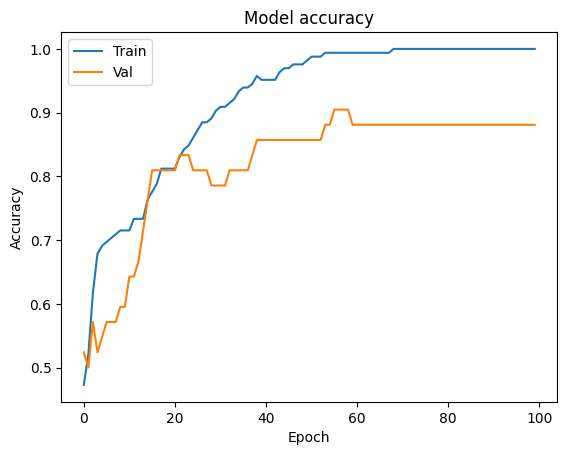

In [24]:
# Ploteamos los resultados en una gráfica de Model accuracy.
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

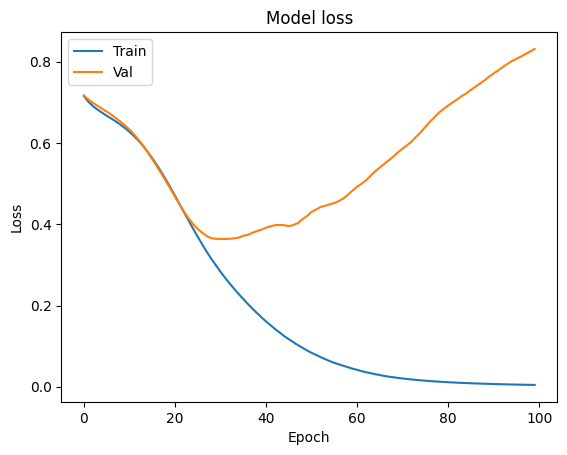

In [25]:
# Ploteamos la pérdida en training y test.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### SEGUNDO MODELO

In [78]:
# Generamos la red neuronal
model = Sequential()
model.add(Dense(128, input_dim = 60, activation = 'relu')),
model.add(Dense(64, activation = 'relu')),
model.add(Dense(32, activation = 'relu')),
model.add(Dense(16, activation = 'relu')),
model.add(Dense(2, activation = 'sigmoid'))

In [79]:
# Resumen del modelo generado.
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 128)               7808      
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dense_56 (Dense)            (None, 32)                2080      
                                                                 
 dense_57 (Dense)            (None, 16)                528       
                                                                 
 dense_58 (Dense)            (None, 2)                 34        
                                                                 
Total params: 18706 (73.07 KB)
Trainable params: 18706 (73.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
# Se realiza la compilación del modelo: función de pérdidas, optimizador
# y métricas

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
# En este caso se utiliza binary_crossentropy porque el problema que
# abordamos, la salida es 0 y 1.

In [81]:
# Entrenamos la red neuronal generada
history = model.fit(X_train, y_train, epochs=35, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/35
3/3 [==============================] - 5s 523ms/step - loss: 0.7337 - accuracy: 0.4424 - val_loss: 0.7012 - val_accuracy: 0.5476
Epoch 2/35
3/3 [==============================] - 0s 41ms/step - loss: 0.6732 - accuracy: 0.6909 - val_loss: 0.6728 - val_accuracy: 0.5714
Epoch 3/35
3/3 [==============================] - 0s 93ms/step - loss: 0.6355 - accuracy: 0.7394 - val_loss: 0.6500 - val_accuracy: 0.6429
Epoch 4/35
3/3 [==============================] - 0s 63ms/step - loss: 0.6047 - accuracy: 0.7697 - val_loss: 0.6295 - val_accuracy: 0.6190
Epoch 5/35
3/3 [==============================] - 0s 38ms/step - loss: 0.5758 - accuracy: 0.8242 - val_loss: 0.6087 - val_accuracy: 0.7143
Epoch 6/35
3/3 [==============================] - 0s 37ms/step - loss: 0.5430 - accuracy: 0.8485 - val_loss: 0.5849 - val_accuracy: 0.7619
Epoch 7/35
3/3 [==============================] - 0s 39ms/step - loss: 0.5096 - accuracy: 0.8485 - val_loss: 0.5578 - val_accuracy: 0.8095
Epoch 8/35
3/3 [==========

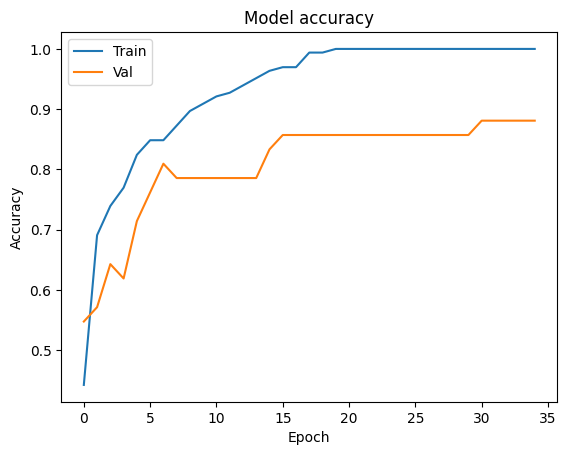

In [82]:
# Ploteamos los resultados en una gráfica de Model accuracy.
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

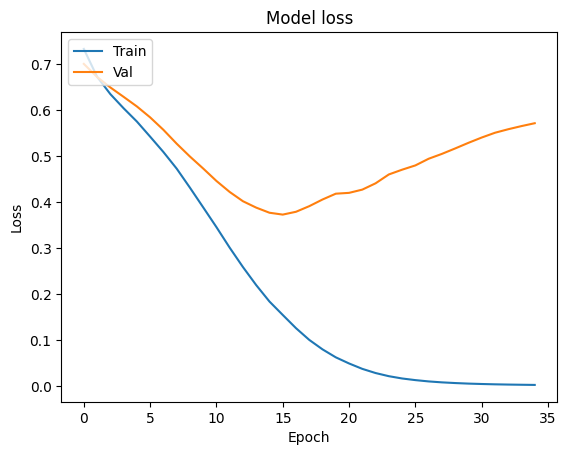

In [83]:
# Ploteamos la pérdida en training y test.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### CONCLUSIONES

El modelo parece estar aprendiendo de los datos de entrenamiento, pero es probable que esté sobreajustándose a ellos. Podríamos identificar el overfitting al observar que, a medida que avanzan las epochs, la precisión en el conjunto de entrenamiento sigue aumentando hasta alcanzar el 100%, mientras que la precisión en el conjunto de validación se estabiliza en alrededor del 90%.